In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import plotly.express as px
import osmnx as ox
import seaborn as sns
from adjustment_formula import *

## Importación de BBDD

### Manzanas + travel times

In [2]:
manzanas = gpd.read_file('../data/BBDD Perú accesibilidad/manzanas_y_tiempos_0a5.geojson')

In [3]:
print(manzanas.shape)
manzanas.head()

(124903, 39)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,path,lat,lng,nearest_neighbor_oferta,distance_to_nearest_neighbor,nearest_neighbor_df2,distance_to_nearest_neighbor_km,distancia_a_centro_05,duracion_a_centro_05,geometry
0,150102000102100023,150102,1,1,2100,23.0,None,18.0,7.0,11.0,...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,-11.813613,-77.127306,5280,0.002603,5280,0.284647,5.1257,61.580000,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,1,1101,10.0,None,31.0,14.0,17.0,...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,-11.737749,-77.151553,6026,0.003448,6026,0.380705,0.5151,6.181667,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,1,600,37.0,None,71.0,32.0,39.0,...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,-11.778100,-77.170172,6024,0.002419,6024,0.268696,0.3698,4.436667,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,1,1202,48.0,None,12.0,5.0,7.0,...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,-11.741225,-77.151765,6026,0.002330,6026,0.254107,0.3591,4.308333,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,1,1202,10.0,A,2.0,0.0,2.0,...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,-11.733255,-77.161875,5326,0.006021,5326,0.662540,1.3167,15.806667,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


### Demanda

In [4]:
demanda = pd.read_csv("../data/BBDD Perú demanda/1_limamet_pob0a5_mz.csv")
print(demanda.shape)
demanda.head()

(92787, 11)


,id,ubigeo,nombdist,cod_mz,pob0a5_mz,pob0a5_dist,pob0a3_mz,pob0a3_dist,pob4a5_mz,pob4a5_dist,geom
0,45548.0,150125,PUENTE PIEDRA,150125000103300030O,7,46940,4.0,30716,3.0,16225,0106000020E6100000010000000103000000010000000C...
1,45561.0,150125,PUENTE PIEDRA,150125000101000052,16,46940,10.0,30716,5.0,16225,0106000020E61000000100000001030000000100000007...
2,45566.0,150125,PUENTE PIEDRA,150125000103600034E,9,46940,8.0,30716,1.0,16225,0106000020E61000000100000001030000000100000010...
3,45569.0,150125,PUENTE PIEDRA,150125000100900035,8,46940,4.0,30716,4.0,16225,0106000020E61000000100000001030000000100000008...
4,45573.0,150125,PUENTE PIEDRA,150125000101300014C,21,46940,10.0,30716,10.0,16225,0106000020E61000000100000001030000000100000032...


In [5]:
demanda.columns

Index(['id', 'ubigeo', 'nombdist', 'cod_mz', 'pob0a5_mz', 'pob0a5_dist',
       'pob0a3_mz', 'pob0a3_dist', 'pob4a5_mz', 'pob4a5_dist', 'geom'],
      dtype='object')

In [6]:
demanda_reduc = demanda[[ 'cod_mz', 'pob0a5_mz', 'pob0a5_dist',
       'pob0a3_mz', 'pob0a3_dist', 'pob4a5_mz', 'pob4a5_dist']]
manzanas_merged = pd.merge(manzanas, demanda_reduc, left_on="Mz", right_on="cod_mz", how="left")

manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126043 entries, 0 to 126042
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Mz                               126043 non-null  object  
 1   UBIGEO                           126043 non-null  int64   
 2   AREA                             126043 non-null  int64   
 3   CODCCPP                          126043 non-null  int64   
 4   ZONA                             126043 non-null  int64   
 5   MANZANA_ID                       123291 non-null  float64 
 6   MANZANA_A                        46601 non-null   object  
 7   T_TOTAL                          126043 non-null  float64 
 8   T_HOMBRES                        126043 non-null  float64 
 9   T_MUJERES                        126043 non-null  float64 
 10  LLAVE_MZS                        126043 non-null  object  
 11  contacto                         126043 non-

### Oferta

In [7]:
oferta = pd.read_csv("../data/BBDD Perú oferta/clean/oferta_0a5_clean.csv")

### Tiempos de viaje

El dataset contiene 2 variables:  
0 corresponde a la distancia  
1 corresponde a la duración del recorrido  

In [8]:
# tiempos = pd.read_csv("../data/BBDD Perú accesibilidad/distance_duration_0 a 5_ok.csv")
# print(tiempos.shape)
# tiempos.head()

#### Matcheo de bases a manzanas

In [9]:
# manzanas_merged['distancia_a_centro_05'] =  tiempos["0"] / 1000 # metros a km
# manzanas_merged['duracion_a_centro_05'] = tiempos["1"] / 60 # segundos a minutos

<Axes: >

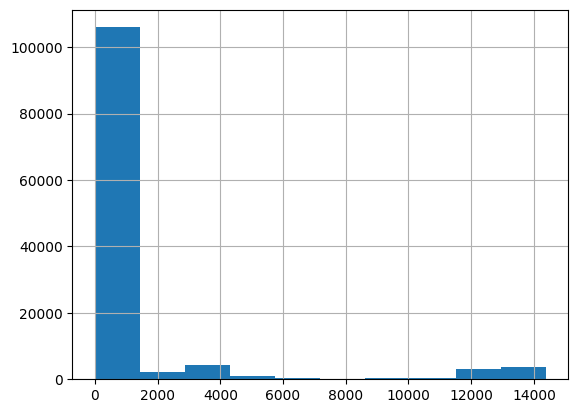

In [10]:
manzanas_merged['duracion_a_centro_05'].hist()

In [11]:
manzanas_merged["duracion_a_centro_05"].median()

3.5

# Desiertos de cuidado

In [12]:
df = pd.DataFrame(manzanas_merged.drop(columns=['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',  'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'cod_mz', 'T_HOMBRES', 'T_MUJERES', 'pob0a3_dist', 'pob4a5_dist', 'pob0a5_dist']))

# Dejo geometry para dropear despues de quitar nulls

df['pob0a5_mz'] = df['pob0a5_mz'].fillna(0)
df['pob0a3_mz'] = df['pob0a3_mz'].fillna(0)
df['pob4a5_mz'] = df['pob4a5_mz'].fillna(0)


df = df.dropna()

Primero observemos las distribuciones de tiempos de viaje en el mapa.

Defino como zonas 'problemáticas' aquellas donde el tiempo caminando es mayor a 20 minutos (considerando que esta caminata se da cargando hijos pequeños). Un 3% de los territorios termina caracterizado como zona a prestarle atención.

In [13]:
df['desierto'] = (df['duracion_a_centro_05'] > 20).astype(int)
df.desierto.value_counts()

desierto
0    101769
1     19677
Name: count, dtype: int64

Para clasificar la población, normalizamos la data y estudiamos criterios empíricos.

In [14]:
print(df.pob0a5_mz.median())
df.pob0a5_mz.describe()


5.0


count    121446.000000
mean          8.533974
std          13.546403
min           0.000000
25%           1.000000
50%           5.000000
75%          12.000000
max        1827.000000
Name: pob0a5_mz, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['pob0a5_mz']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])



In [16]:
df["pob_0a5_mz_normal"]= df_scaled

In [17]:
df.pob_0a5_mz_normal.describe()

count    1.214460e+05
mean     1.872220e-17
std      1.000004e+00
min     -6.299834e-01
25%     -5.561628e-01
50%     -2.608802e-01
75%      2.558643e-01
max      1.342403e+02
Name: pob_0a5_mz_normal, dtype: float64

Estudio tres posibilidades:

In [18]:
umbral1 = df.pob_0a5_mz_normal.mean()
umbral2 = df.pob_0a5_mz_normal.mean() + df.pob0a5_mz.std()
umbral3 = df.pob_0a5_mz_normal.median()

In [19]:
#df['alta_demanda_1'] = (df['pob_0a5_mz_normal'] >= umbral1).astype(int)
#df['alta_demanda_2'] = (df['pob_0a5_mz_normal'] >= umbral2).astype(int)
df['alta_demanda'] = (df['pob_0a5_mz_normal'] >= umbral3).astype(int)

#print(df.alta_demanda_1.value_counts())
#print(df.alta_demanda_2.value_counts())
print(df.alta_demanda.value_counts())

alta_demanda
1    65257
0    56189
Name: count, dtype: int64


In [20]:
df["desierto_0a5"] = df["desierto"] * df["alta_demanda"]
df.desierto_0a5.value_counts()

desierto_0a5
0    120810
1       636
Name: count, dtype: int64

In [21]:
df.desierto_0a5.value_counts()[1]/len(df.desierto_0a5)

0.005236895410305815

In [22]:
df.columns

Index(['T_TOTAL', 'lat', 'lng', 'nearest_neighbor_oferta',
       'distance_to_nearest_neighbor', 'nearest_neighbor_df2',
       'distance_to_nearest_neighbor_km', 'distancia_a_centro_05',
       'duracion_a_centro_05', 'geometry', 'pob0a5_mz', 'pob0a3_mz',
       'pob4a5_mz', 'desierto', 'pob_0a5_mz_normal', 'alta_demanda',
       'desierto_0a5'],
      dtype='object')

In [23]:
df_for_csv = df[["geometry", "T_TOTAL", "distancia_a_centro_05", "duracion_a_centro_05", "alta_demanda", "desierto_0a5"]]
df_for_csv.head()

,geometry,T_TOTAL,distancia_a_centro_05,duracion_a_centro_05,alta_demanda,desierto_0a5
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",18.0,5.1257,61.580000,0,0
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",31.0,0.5151,6.181667,1,0
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",71.0,0.3698,4.436667,1,0
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",12.0,0.3591,4.308333,1,0
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",2.0,1.3167,15.806667,0,0


In [24]:
#df_for_csv['geometry'] = df_for_csv['geometry'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(df_for_csv, geometry='geometry')

manzanas_merged_2 = pd.merge(gdf, manzanas[["Mz", "UBIGEO", 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry']], on="geometry", how="left")
print(manzanas_merged_2.shape)
manzanas_merged_2.head()

(124074, 13)


,geometry,T_TOTAL,distancia_a_centro_05,duracion_a_centro_05,alta_demanda,desierto_0a5,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",18.0,5.1257,61.580000,0,0,150102000102100023,150102,1,1,2100,23.0,None
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",31.0,0.5151,6.181667,1,0,150102000101101010,150102,1,1,1101,10.0,None
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",71.0,0.3698,4.436667,1,0,150102000100600037,150102,1,1,600,37.0,None
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",12.0,0.3591,4.308333,1,0,150102000101202048,150102,1,1,1202,48.0,None
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",2.0,1.3167,15.806667,0,0,150102000101202010A,150102,1,1,1202,10.0,A


In [25]:
manzanas_merged_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 124074 entries, 0 to 124073
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   geometry               124074 non-null  geometry
 1   T_TOTAL                124074 non-null  float64 
 2   distancia_a_centro_05  124074 non-null  float64 
 3   duracion_a_centro_05   124074 non-null  float64 
 4   alta_demanda           124074 non-null  int32   
 5   desierto_0a5           124074 non-null  int32   
 6   Mz                     124074 non-null  object  
 7   UBIGEO                 124074 non-null  int64   
 8   AREA                   124074 non-null  int64   
 9   CODCCPP                124074 non-null  int64   
 10  ZONA                   124074 non-null  int64   
 11  MANZANA_ID             121673 non-null  float64 
 12  MANZANA_A              45901 non-null   object  
dtypes: float64(4), geometry(1), int32(2), int64(4), object(2)
memory u

### Densidad poblacional

In [26]:
gdf_projected = pop_density(gdf=manzanas_merged_2, projected_crs='EPSG:24891', tot_pob_col='T_TOTAL')

In [27]:
gdf_projected.groupby('desierto_0a5')['area_manzana'].mean()


desierto_0a5
0     6374.981271
1    32720.926287
Name: area_manzana, dtype: float64

El área de las manzanas clasificadas como desiertos de cuidado es sustancialmente más alta. La siguiente sección busca introducir un factor de corrección para esto (ya que esto sucede porque el tiempo de viaje se mide desde los centroides de los segmentos; cuando los segmentos son más grandes, esta es mayor por defecto).

## Fórmula de ajuste en base a área de las manzanas y densidad poblacional

Para mejorar la identificación de los _desiertos de cuidado_ en un conjunto de datos de manzanas urbanas, se propone un método de ajuste que toma en cuenta tanto el área de las manzanas como la densidad poblacional. El objetivo es ajustar el umbral de tiempo de viaje necesario para considerar una manzana como un desierto de cuidado, aumentando este umbral para manzanas más grandes y con menor densidad poblacional. Se busca corregir la sobreestimación de los tiempos de viaje para las manzanas de mayor tamaño, y se penaliza especialmente las manzanas más grandes con menor densidad poblacional.

### Fórmula:

El ajuste se basa en dos parámetros principales, $ \beta$ y $\gamma$, que modulan la sensibilidad del ajuste en función del área de la manzana y su densidad poblacional, respectivamente. La fórmula es la siguiente:

$$ \text{Ajuste} = \begin{cases} \beta \times (\log(1 + \text{area mz}) - \log(1 + A_{umbral})) + \frac{\gamma}{\log(1 + \text{densidad pob})} & \text{si area mz} > A_{umbral} \\ 0 & \text{de lo contrario} \end{cases} $$

Donde:
- $ A_{umbral} $ es el umbral de área. Este parámetro puede ajustarse. En este caso, es definido como el percentil 75 del área de todas las manzanas, utilizado para determinar cuáles manzanas son sujetas al ajuste. Se busca asegurar que solo las manzanas de mayor tamaño tengan tiempos de viaje ajustados.
- $ \beta $ modula cómo el tamaño de la manzana por encima del umbral aumenta el umbral de tiempo de viaje.
- $ \gamma $ ajusta la influencia de la densidad poblacional en el umbral de tiempo de viaje, donde una menor densidad poblacional incrementa el umbral.

Este ajuste se aplica solo a manzanas cuyo área supera $ A_{umbral} $, con el objetivo de aumentar el umbral de tiempo de viaje para ser considerado un desierto de cuidado en manzanas grandes y/o con baja densidad poblacional.

**Nota**: La inclusión de la operación $ - \log(1 + A_{umbral}) $ en la fórmula tiene como objetivo normalizar el ajuste de acuerdo al tamaño del área de la manzana en relación con el umbral establecido $ A_{umbral}$. Al restar este valor, se asegura que el ajuste comience efectivamente desde cero para las manzanas que justo superan el umbral, creando un punto de partida uniforme para el ajuste en todas las manzanas que son sujetas a este. Este enfoque mejora la equidad del ajuste, asegurando que las manzanas no sean penalizadas o ajustadas de manera significativa solo por estar ligeramente por encima del umbral.

**Transformaciones logarítmicas**: Estas convierten una escala que puede ser muy amplia y posiblemente sesgada (con algunas manzanas mucho más grandes/densas que la mayoría) en una escala más uniforme y menos sesgada. Esto es particularmente útil cuando las diferencias absolutas grandes en áreas (por ejemplo, entre manzanas muy grandes y pequeñas) no son tan relevantes para el análisis como las diferencias relativas o proporcionales.


In [28]:
manzanas_0a5_recalc = adjustment_factor(gdf_projected, beta=10, gamma=5, umbral_area=0.80, 
                                         nombre_col_desierto='desierto_0a5_recalc',
                                         travel_time_col='duracion_a_centro_05')

In [29]:
# # Parameters
# beta = 3  # Sensitivity of the area-based adjustment
# gamma = 20  # Adjusted sensitivity for population density; experiment with this value

# manzanas_0a5_recalc = adjustment_factor(gdf_projected, beta=beta, gamma=gamma, umbral_area=0.75, 
#                                          nombre_col_desierto='desierto_0a5_recalc',
#                                          travel_time_col='duracion_a_centro_05')


# Compare results
print("Care deserts recalculated with adjustment:")
print(manzanas_0a5_recalc["desierto_0a5_recalc"].value_counts())

print("\nOriginal care deserts classification:")
print(manzanas_0a5_recalc["desierto_0a5"].value_counts())

Care deserts recalculated with adjustment:
desierto_0a5_recalc
0    123514
1       560
Name: count, dtype: int64

Original care deserts classification:
desierto_0a5
0    123426
1       648
Name: count, dtype: int64


In [30]:
# Tracts considered care deserts before the adjustment
care_deserts_before = manzanas_0a5_recalc[manzanas_0a5_recalc["desierto_0a5"] == 1]['area_manzana']

# Tracts considered care deserts after the adjustment
care_deserts_after = manzanas_0a5_recalc[manzanas_0a5_recalc["desierto_0a5_recalc"] == 1]['area_manzana']

# Calculate descriptive statistics
print("Before Adjustment:")
print(care_deserts_before.describe())

print("\nAfter Adjustment:")
print(care_deserts_after.describe())


Before Adjustment:
count    6.480000e+02
mean     3.272093e+04
std      1.285031e+05
min      9.855876e+01
25%      1.568572e+03
50%      3.297468e+03
75%      7.561923e+03
max      1.317401e+06
Name: area_manzana, dtype: float64

After Adjustment:
count       560.000000
mean       8206.503051
std       28009.963518
min          98.558756
25%        1354.147192
50%        2865.865151
75%        4922.450205
max      367447.187198
Name: area_manzana, dtype: float64


In [31]:
manzanas_0a5_recalc.columns

Index(['geometry', 'T_TOTAL', 'distancia_a_centro_05', 'duracion_a_centro_05',
       'alta_demanda', 'desierto_0a5', 'Mz', 'UBIGEO', 'AREA', 'CODCCPP',
       'ZONA', 'MANZANA_ID', 'MANZANA_A', 'area_manzana', 'densidad_pob',
       'combined_adjustment', 'adjusted_threshold', 'desierto_2',
       'desierto_0a5_recalc'],
      dtype='object')

In [32]:
manzanas_0a5_recalc = manzanas_0a5_recalc[['Mz', 'UBIGEO', 'AREA', 'CODCCPP',
       'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry', 'distancia_a_centro_05',
       'duracion_a_centro_05', 'alta_demanda', 'desierto_0a5_recalc', 'adjusted_threshold']]

manzanas_0a5_recalc = manzanas_0a5_recalc.rename(columns={"adjusted_threshold": "umbral_t_dinamico"})

manzanas_0a5_recalc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 124074 entries, 0 to 124073
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Mz                     124074 non-null  object  
 1   UBIGEO                 124074 non-null  int64   
 2   AREA                   124074 non-null  int64   
 3   CODCCPP                124074 non-null  int64   
 4   ZONA                   124074 non-null  int64   
 5   MANZANA_ID             121673 non-null  float64 
 6   MANZANA_A              45901 non-null   object  
 7   geometry               124074 non-null  geometry
 8   distancia_a_centro_05  124074 non-null  float64 
 9   duracion_a_centro_05   124074 non-null  float64 
 10  alta_demanda           124074 non-null  int32   
 11  desierto_0a5_recalc    124074 non-null  int32   
 12  umbral_t_dinamico      124074 non-null  float64 
dtypes: float64(4), geometry(1), int32(2), int64(4), object(2)
memory u

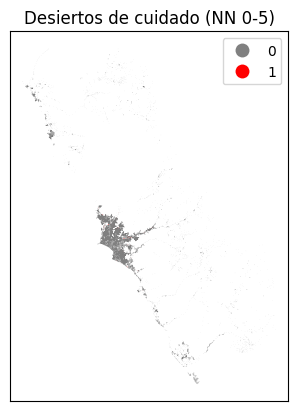

In [33]:
import matplotlib
#geopan = gpd.GeoDataFrame(df, geometry='geometry')

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
manzanas_0a5_recalc.plot(column='desierto_0a5_recalc', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (NN 0-5)')

# Save the figure with high resolution
plt.savefig('../figs/desiertos_de_cuidado_0a5.png', format='png', dpi=1500)

plt.show()

In [34]:
manzanas_0a5_recalc.to_csv("../results - desiertos/desiertos_ajustados/desiertos_0a5_recalc.csv", index=False, sep=";", decimal=",")

In [35]:
manzanas_0a5_recalc.to_file("../results - desiertos/desiertos_ajustados/desiertos_0a5_recalc.geojson", driver='GeoJSON')